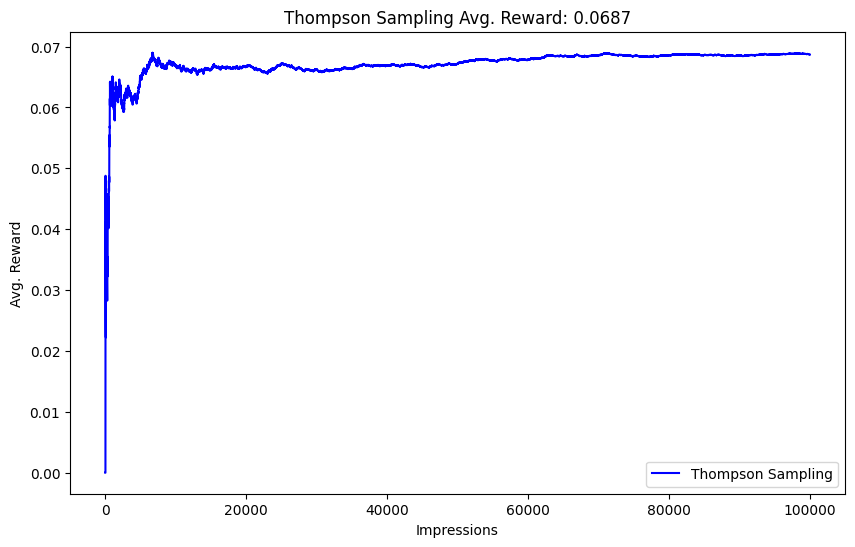

The ad with the highest estimated probability is Microsoft Office 365


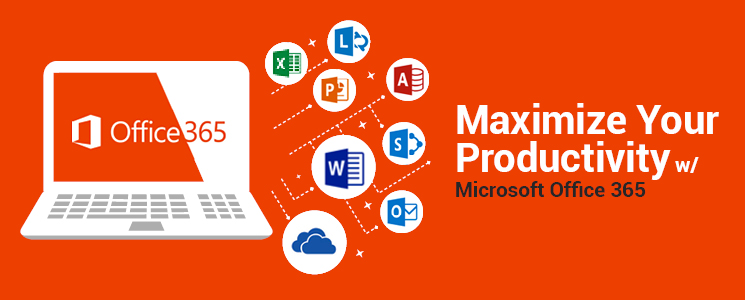

Estimated Probability: 0.0692


In [28]:
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
from IPython.display import display

class CustomBandit:
    def __init__(self, ad_data, image_folder):
        self.ad_data = ad_data
        self.image_folder = image_folder

    def display_ad(self, ad_index):
        reward = np.random.binomial(n=1, p=self.ad_data[ad_index]['p'])
        return reward

# Your custom ad dataset with image filenames (assuming they are in the same folder as your notebook)
custom_ads = [
    {'name': 'Mc Donalds', 'p': 0.004, 'image_filename': 'mcd.jpeg'},
    {'name': 'Milo', 'p': 0.016, 'image_filename': 'milo.jpeg'},
    {'name': 'Microsoft Office 365', 'p': 0.070, 'image_filename': 'msoffice.jpg'},
    {'name': 'Samsung Galaxy S8+', 'p': 0.028, 'image_filename': 'samsung.jpeg'},
    {'name': 'Starbuck', 'p': 0.031, 'image_filename': 'starbuck.jpg'},
]

# Specify the folder where your images are located (relative or absolute path)
image_folder = './ads_image'  # Update this to the actual path

# Initialize the bandit environment
bandit_environment = CustomBandit(custom_ads, image_folder)

n_prod = 100000
n_ads = len(custom_ads)  # Use the number of custom ads
alphas = np.ones(n_ads)
betas = np.ones(n_ads)
total_reward = 0
avg_rewards = []

for i in range(n_prod):
    theta_samples = [np.random.beta(alphas[k], betas[k]) for k in range(n_ads)]
    ad_chosen = np.argmax(theta_samples)
    R = bandit_environment.display_ad(ad_chosen)
    alphas[ad_chosen] += R
    betas[ad_chosen] += 1 - R
    total_reward += R
    avg_rewards_so_far = total_reward / (i + 1)
    avg_rewards.append(avg_rewards_so_far)

# Create a new figure for the Thompson Sampling rewards
plt.figure(figsize=(10, 6))
plt.plot(avg_rewards, label='Thompson Sampling', color='blue')
plt.title("Thompson Sampling Avg. Reward: {:.4f}".format(avg_rewards_so_far))
plt.xlabel('Impressions')
plt.ylabel('Avg. Reward')
plt.legend()
plt.show()

# Calculate the ad with the highest estimated probability
ad_with_highest_probability = np.argmax(alphas / (alphas + betas))
ad_names = [ad['name'] for ad in custom_ads]
ad_banner = [ad['image_filename'] for ad in custom_ads]

# Print information about the ad with the highest probability
print(f"The ad with the highest estimated probability is {ad_names[ad_with_highest_probability]}")
image = Image.open(f"{image_folder}/{ad_banner[ad_with_highest_probability]}")
display(image)
print(f"Estimated Probability: {alphas[ad_with_highest_probability] / (alphas[ad_with_highest_probability] + betas[ad_with_highest_probability]):.4f}")
